In [70]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [71]:

# Load Dataset
df = pd.read_csv("Mall_Customers.csv")
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  16                      81
2           3  Female   20                  17                       6
3           4    Male   23                  18                      77
4           5  Female   31                  19                      40


In [72]:

# Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count    10.00000  10.000000            10.00000               10.000000
mean      5.50000  28.800000            19.50000               49.400000
std       3.02765  13.464356             3.02765               35.094159
min       1.00000  19.000000            15.00000                3.000000
25%       3.25000  21.250000            17.25000               14.250000
50%       5.50000  23.000000         

In [73]:

# Encode 'Gender' column (Optional)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


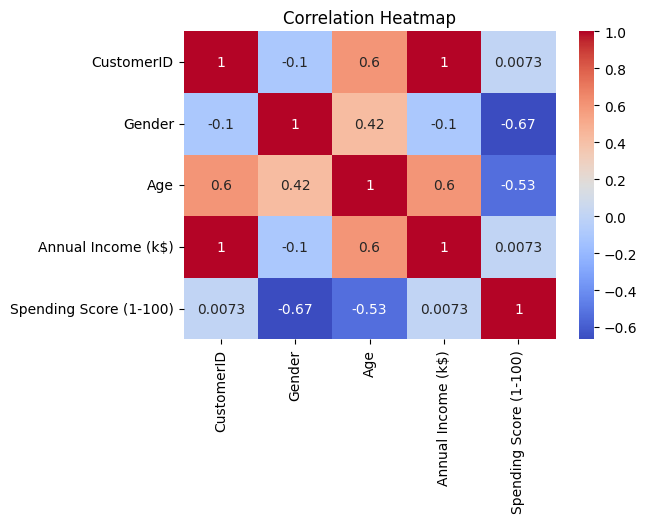

In [74]:

# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


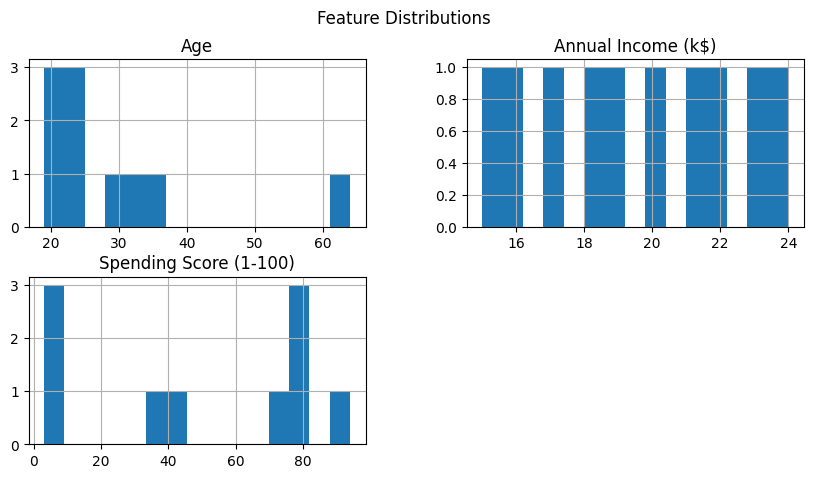

In [75]:

# Histograms
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(10, 5))
plt.suptitle("Feature Distributions")
plt.show()


In [76]:

# Feature Selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [77]:

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:

# Elbow Method to Determine Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


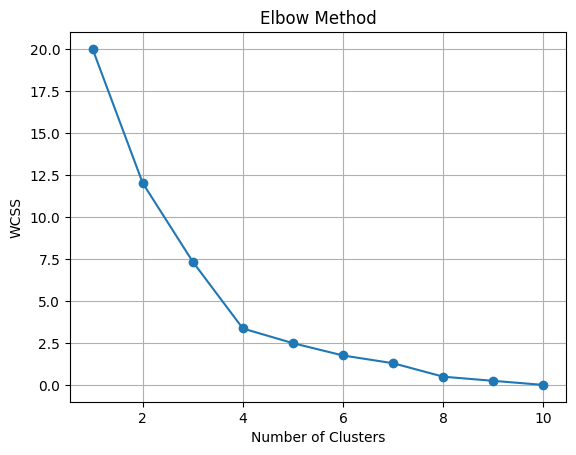

In [79]:

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()



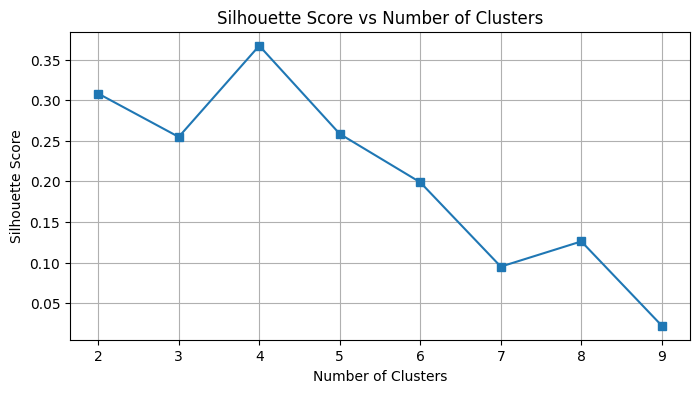

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='s', linestyle='-')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [84]:
# Apply KMeans with optimal clusters (4 in this case based on silhouette)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster to dataframe
df['Cluster'] = y_kmeans


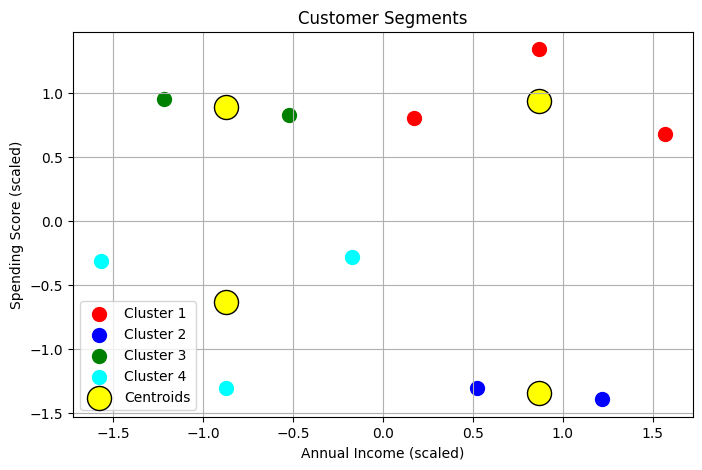

In [85]:
# Cluster Plot
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green', 'cyan']
for i in range(4):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


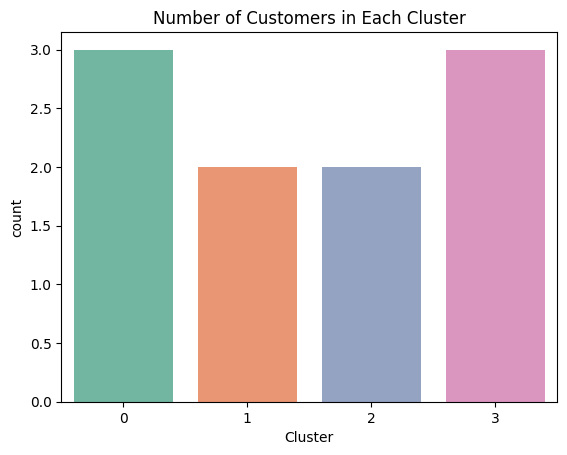

In [86]:
# Countplot for Clusters
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Number of Customers in Each Cluster")
plt.show()

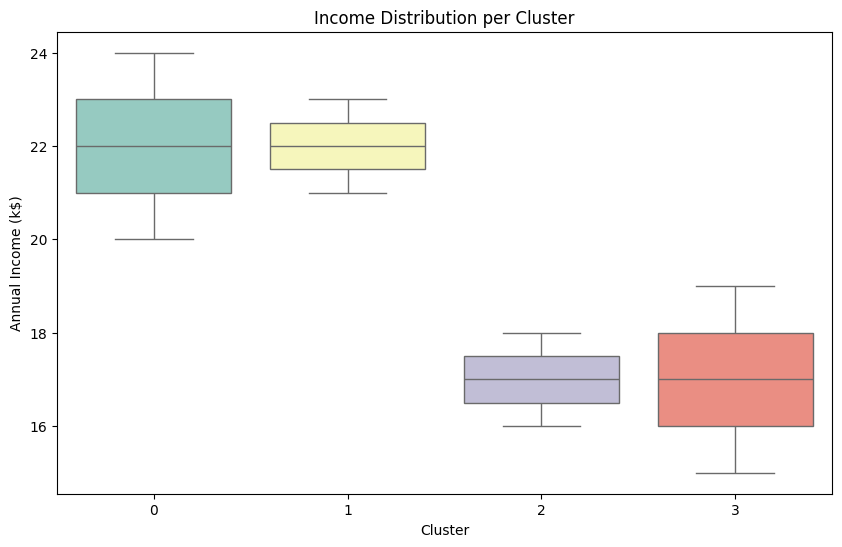

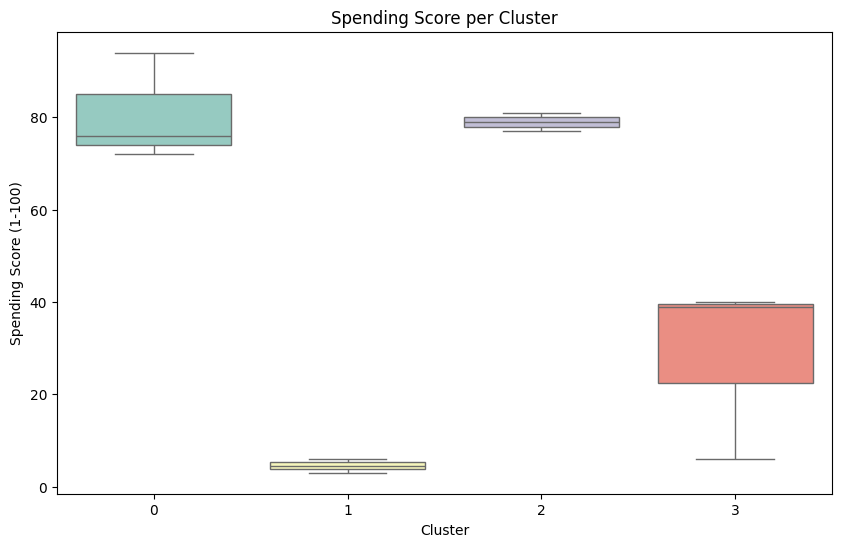

In [87]:

# Boxplots to analyze clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='Set3')
plt.title("Income Distribution per Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title("Spending Score per Cluster")
plt.show()